In [1]:
import os
import pandas as pd
import numpy as np
from src.signals.ppg import PPGSubject
from src.signals.eeg import EEGSubject
from src.signals.subject import Subject
from src.signals.eda import EDAExperiment
from src.experiments.experiment import ExperimentType
from math import sqrt, log10
from src.classifiers.tuning.hptuning import Tuner, get_hyperparameters, best_trial_hyperparameter
from src.classifiers.hyperparameters import Hyperparameters
# from src.signals.eda import 

path = os.getcwd()
survey_path = "{0}/survey_gamification".format(os.getcwd())

2024-09-24 20:21:23.405778: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-24 20:21:23.407459: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 20:21:23.414576: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 20:21:23.434743: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 20:21:23.469176: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [78]:
df = pd.read_csv(os.path.join(survey_path, "12", "samsung_ppg.csv"))

In [87]:
df['ppg'].mean().__str__()

'1854998.4443228787'

In [2]:
exp = EDAExperiment(path=path, type=ExperimentType.END_TO_END, classifier="cnn")

In [3]:
t = Tuner(exp).load_trials()

In [4]:
trial = t.best_trial['result']['x']
filters_multipliers = trial['filters_multipliers']
filters = trial[ 'filters' ]
kernel_size_multiplier = trial[ 'kernel_size_multiplier' ]
kernel_sizes = trial[ 'kernel_sizes' ]
dense_outputs = trial[ 'dense_outputs' ]
depth = trial[ 'depth' ]
lstm_units = trial[ 'lstm_units' ]
batch_size = trial[ 'batch_size' ]
epochs = trial[ 'epochs' ]
_lr = trial[ 'lr' ]
lr_power = log10(1 / _lr)
decay = trial[ 'decay' ]
reduce_lr_factor = trial[ 'reduce_lr_factor' ]
reduce_lr_patience = trial[ 'reduce_lr_patience' ]
class_weights = trial[ 'class_weights' ]
baseline_weight = class_weights[0]


In [7]:
1 / 10 ** log10(1 / 0.01)

0.01

In [5]:
best_trial_hyperparameter(t).dict()

lr: 0.1
lr_power: 1.0


{'filters_multipliers': 0.5,
 'filters': None,
 'kernel_size_multiplier': 2,
 'kernel_sizes': None,
 'dense_outputs': None,
 'depth': None,
 'lstm_units': None,
 'batch_size': 32,
 'epochs': 107,
 'lr': 0.1,
 'decay': 0,
 'reduce_lr_factor': 0.2,
 'reduce_lr_patience': 5,
 'class_weights': {0: 9, 1: 1}}

In [6]:
trial

{'filters_multipliers': 0.5,
 'filters': None,
 'kernel_size_multiplier': 2,
 'kernel_sizes': None,
 'dense_outputs': None,
 'depth': None,
 'lstm_units': None,
 'batch_size': 32,
 'epochs': 107,
 'lr': 0.1,
 'decay': 0,
 'reduce_lr_factor': 0.2,
 'reduce_lr_patience': 5,
 'class_weights': {0: 9, 1: 1}}

In [24]:

h.dict()

{'filters_multipliers': 0.5,
 'filters': None,
 'kernel_size_multiplier': 2,
 'kernel_sizes': None,
 'dense_outputs': None,
 'depth': None,
 'lstm_units': None,
 'batch_size': 32,
 'epochs': 107,
 'lr': 0.01,
 'decay': 0,
 'reduce_lr_factor': 0.2,
 'reduce_lr_patience': 5,
 'class_weights': {0: 9, 1: 1}}

In [35]:
ppg = PPGSubject(path=survey_path, subject_id="11", device="samsung", sensor="ppg")
emp = PPGSubject(path=survey_path, subject_id="11", device="empatica", sensor="ppg")
eda = Subject(path=survey_path, id="11", device="empatica", sensor="eda")

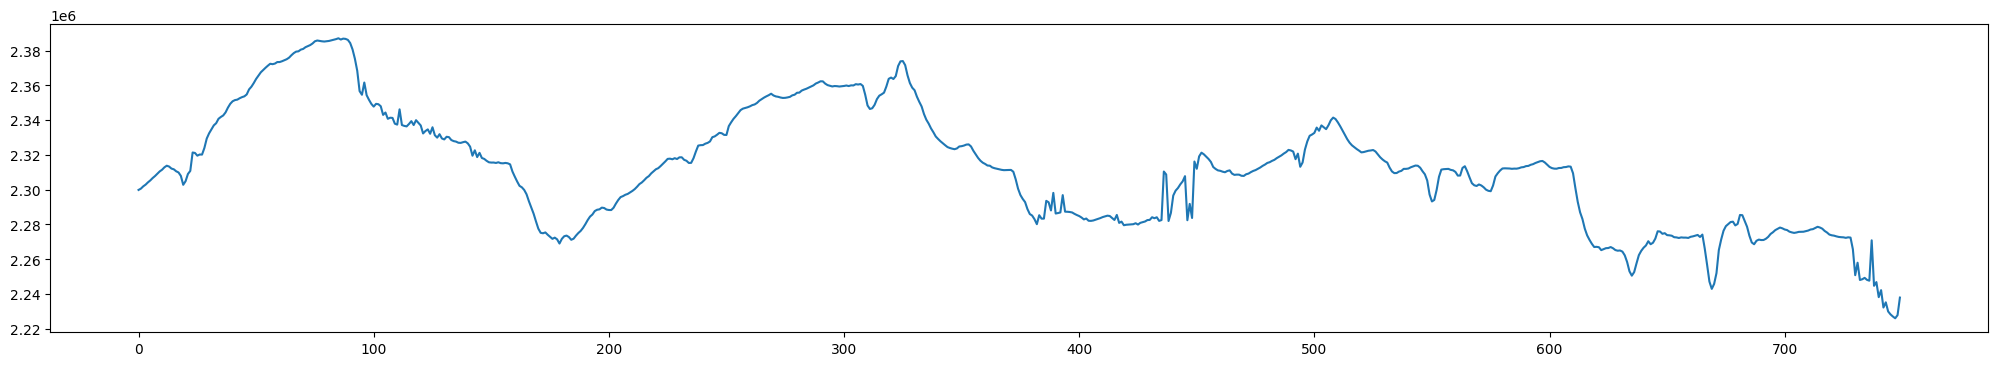

In [94]:
ppg.show(1)

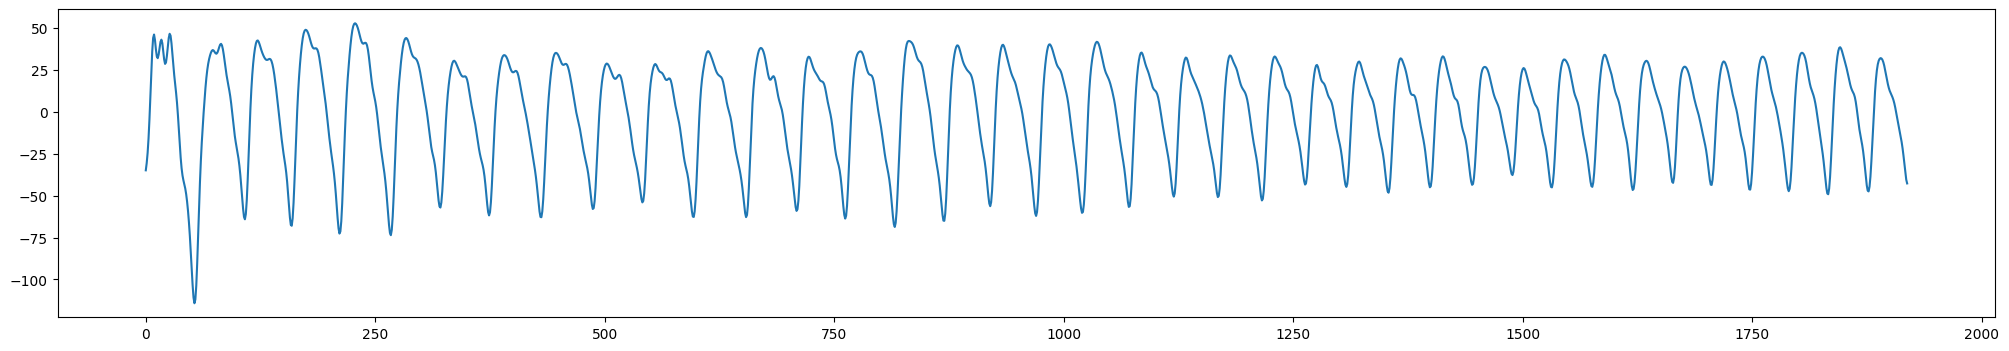

In [93]:
emp.show(1)

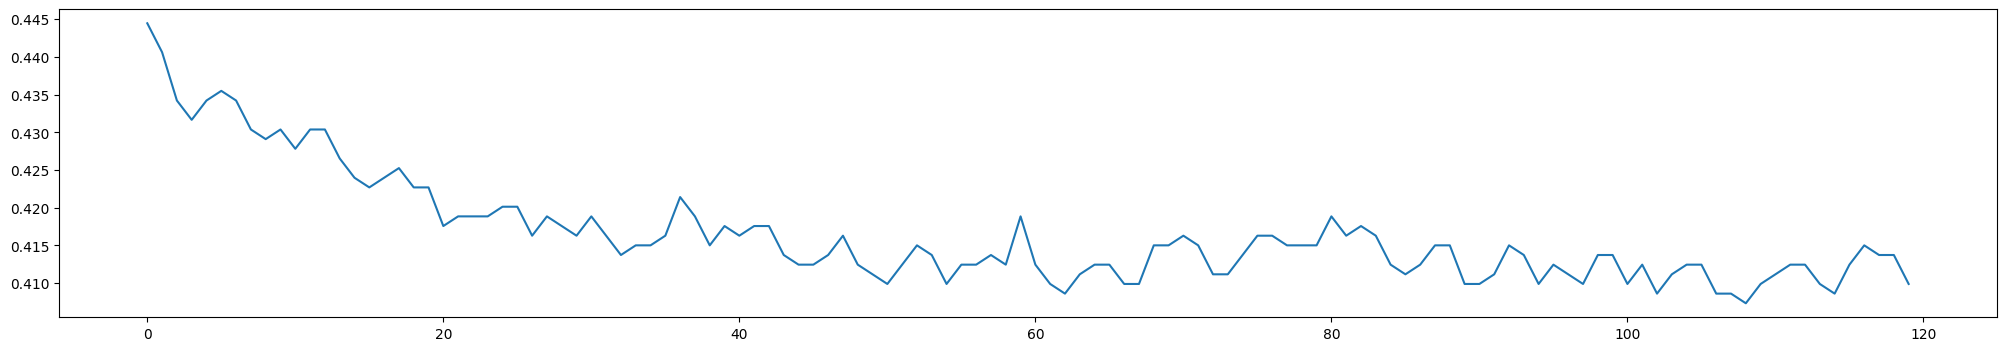

In [95]:
eda.show(1)

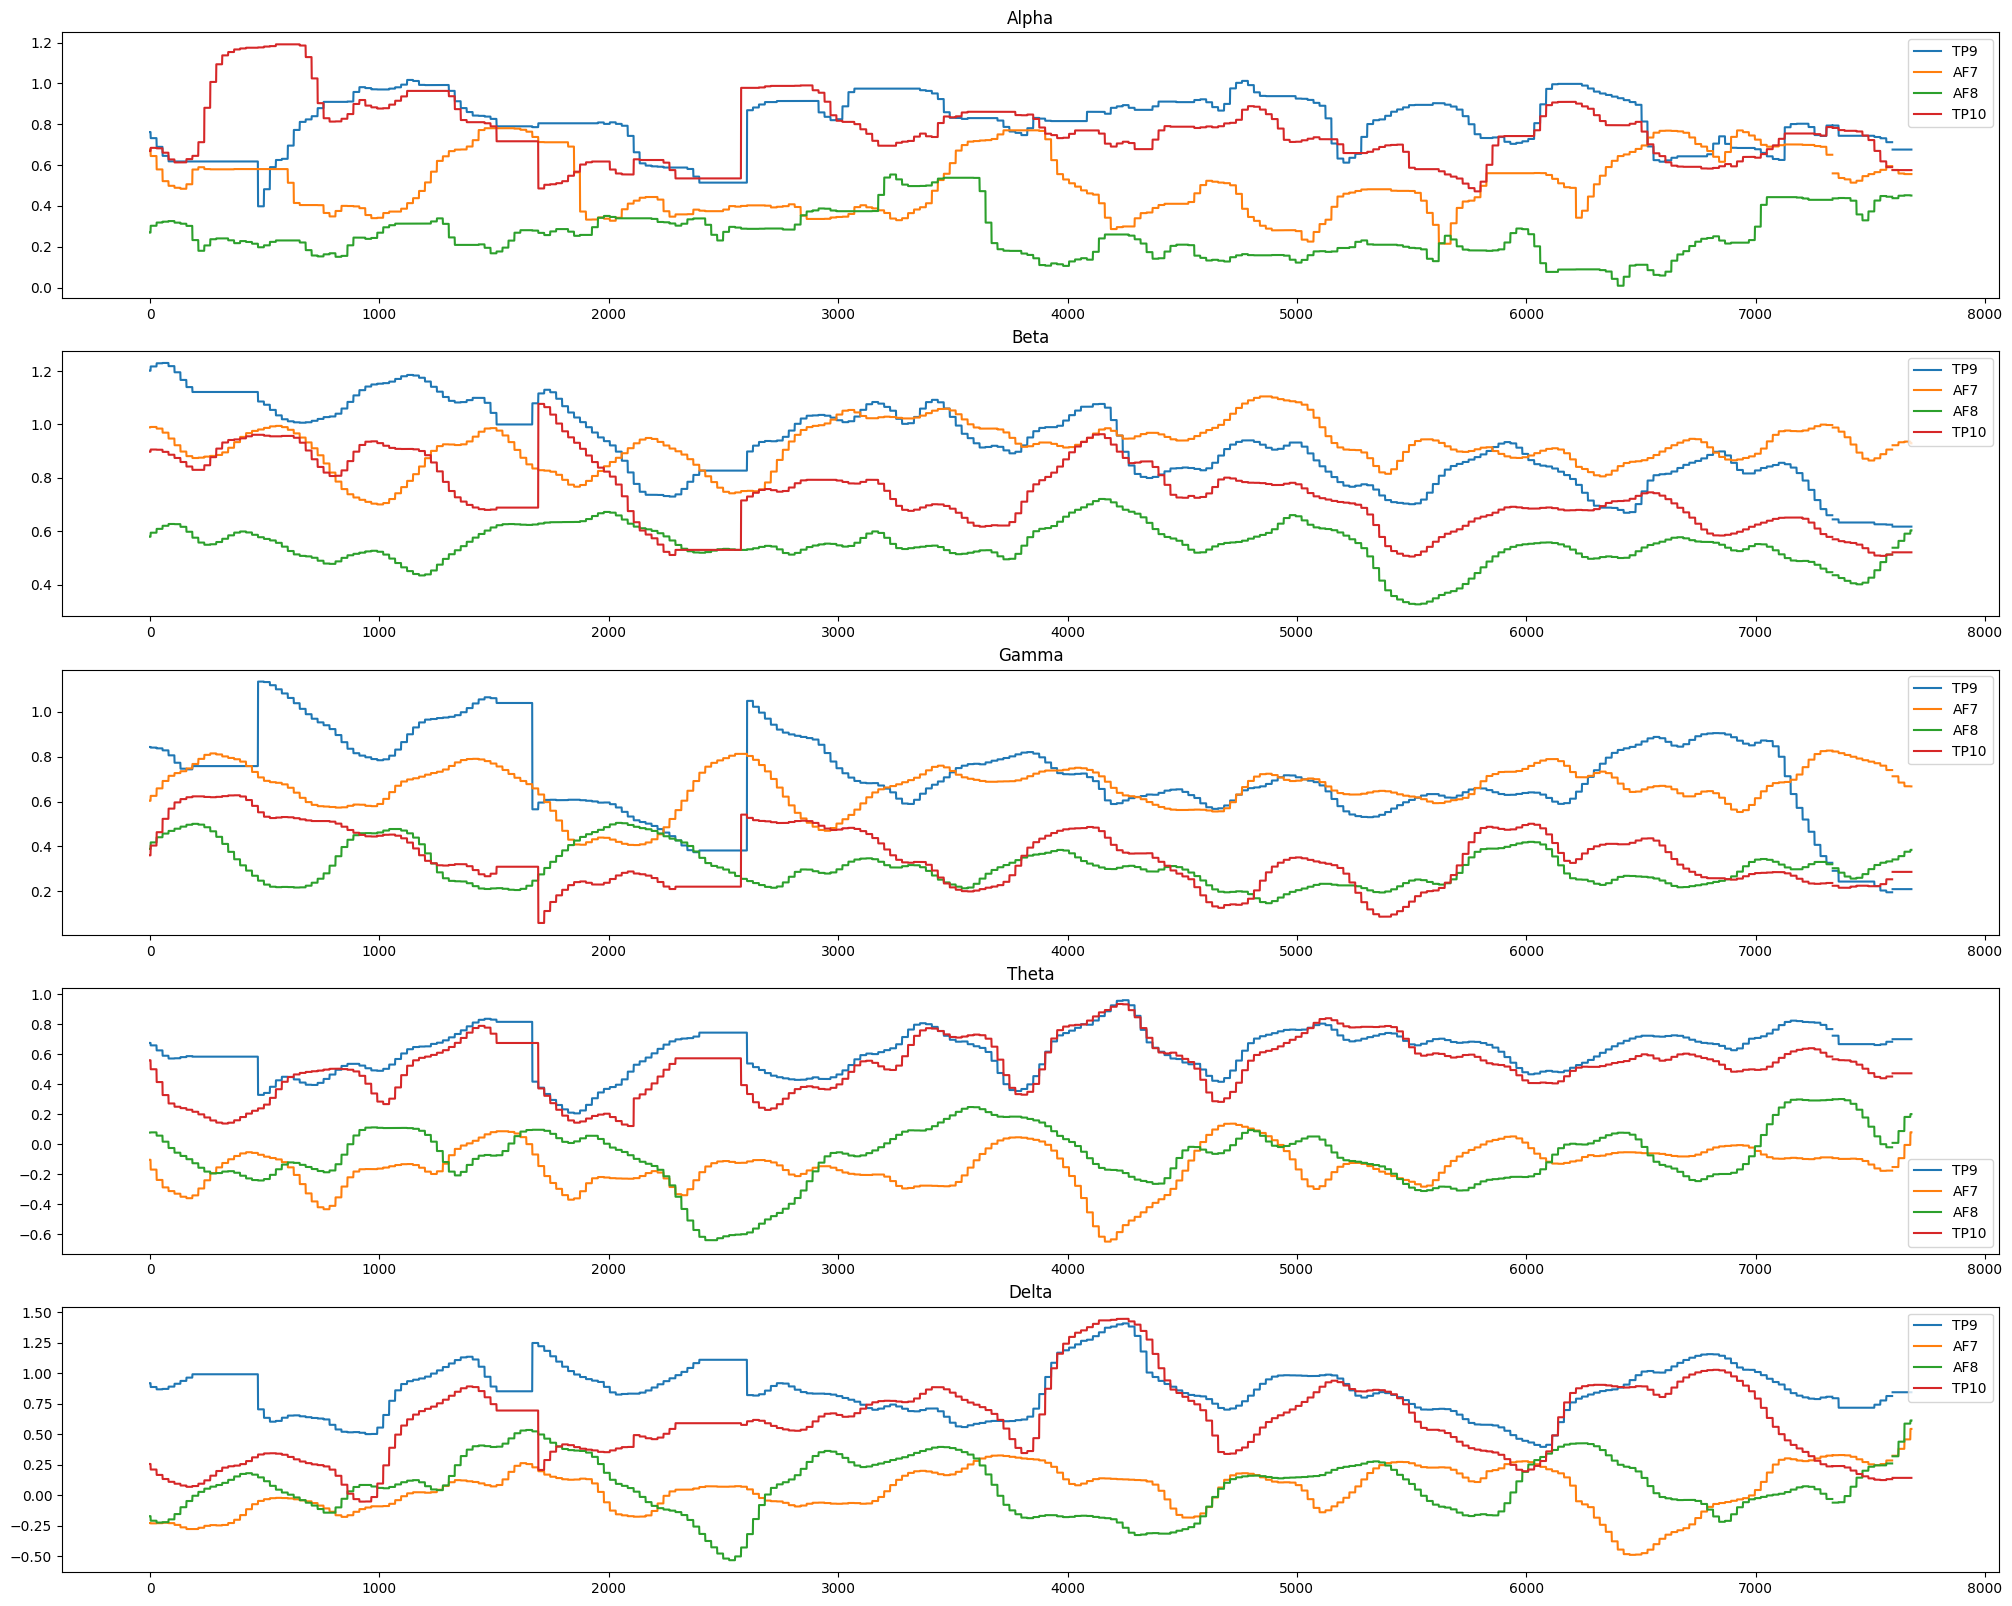

In [98]:
eeg.show(1)

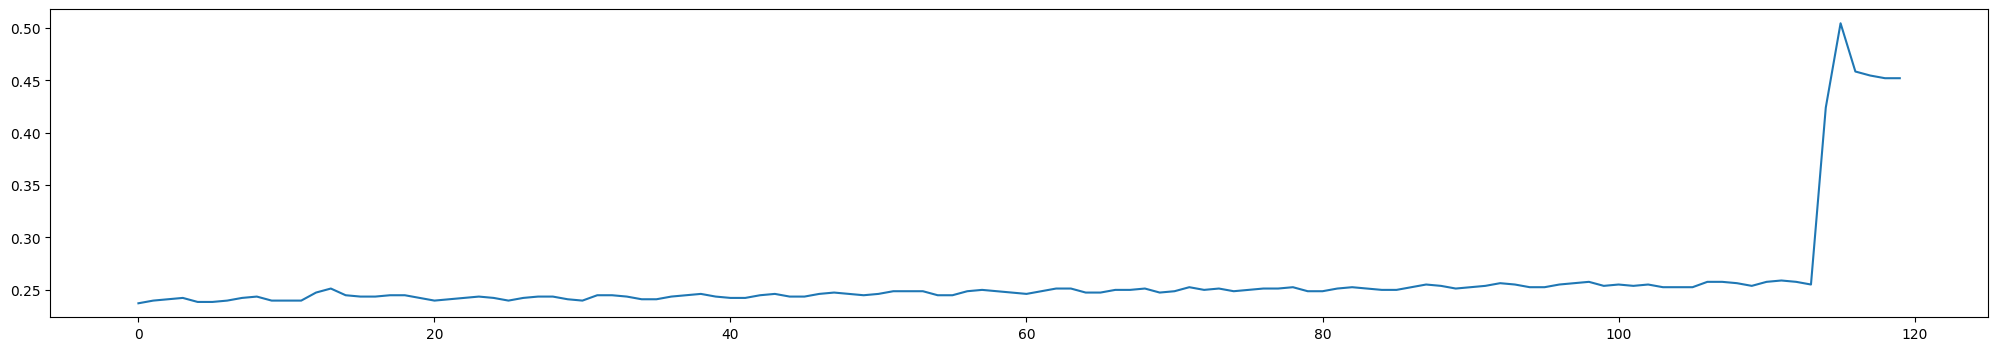

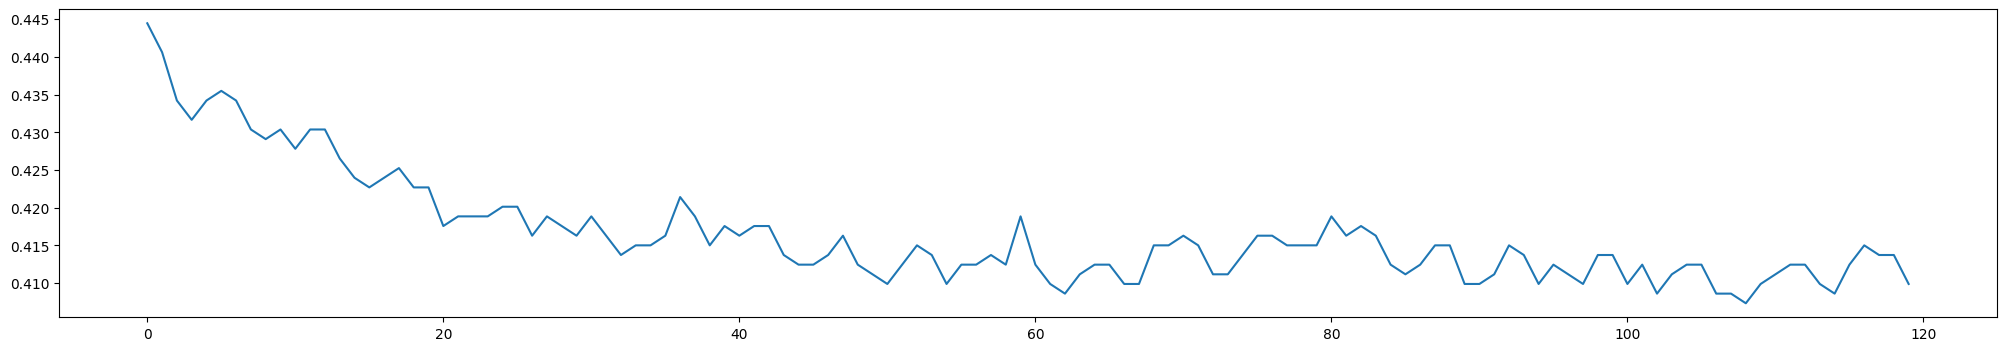

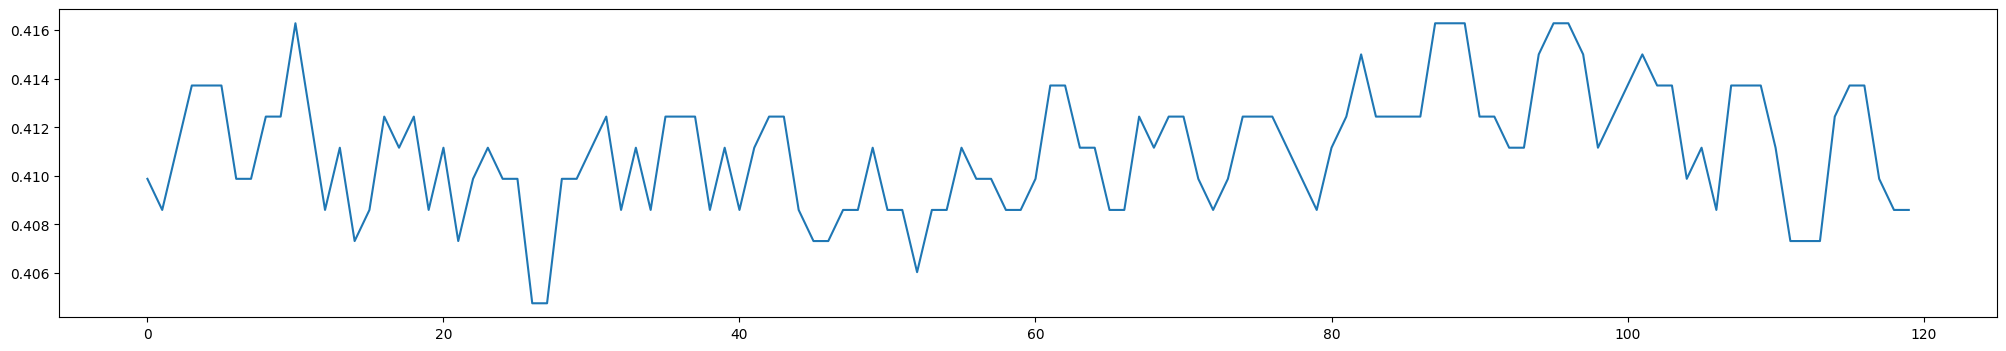

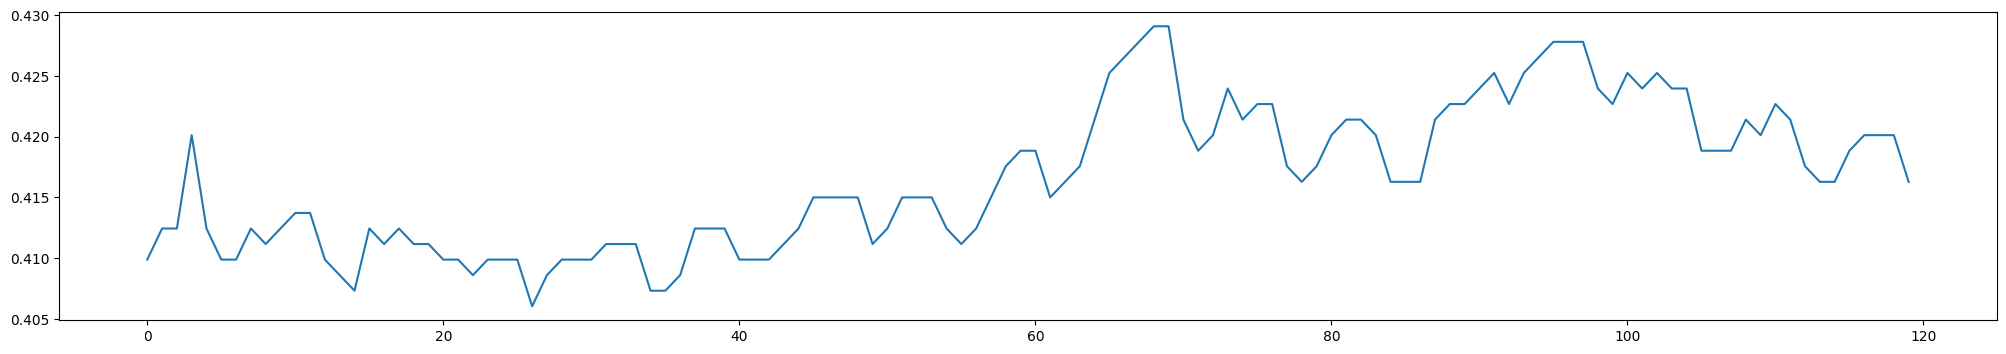

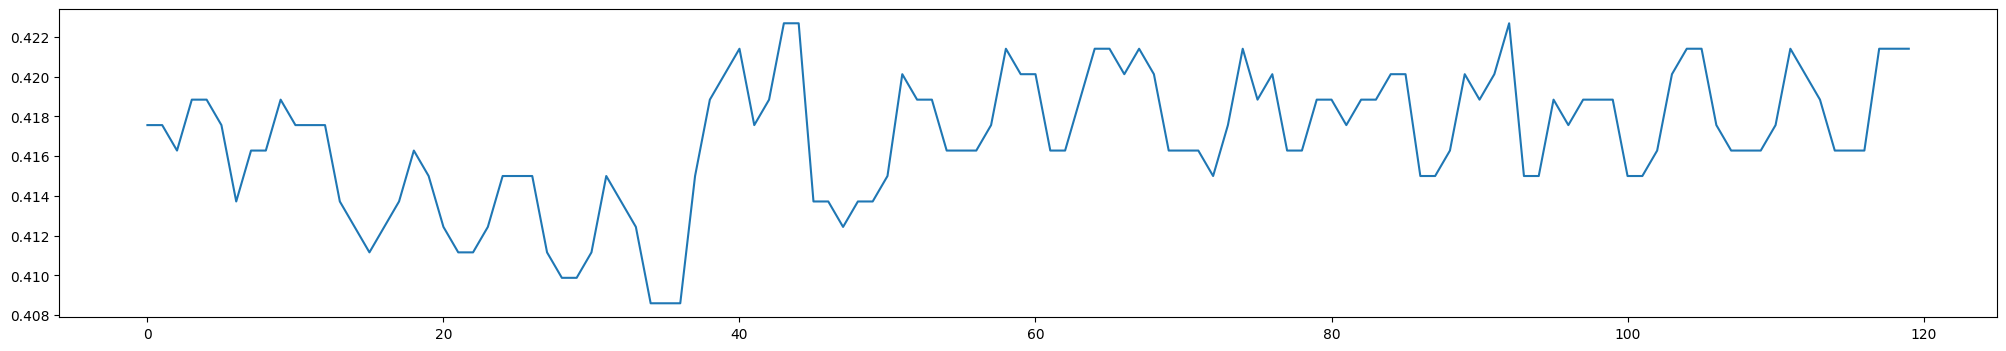

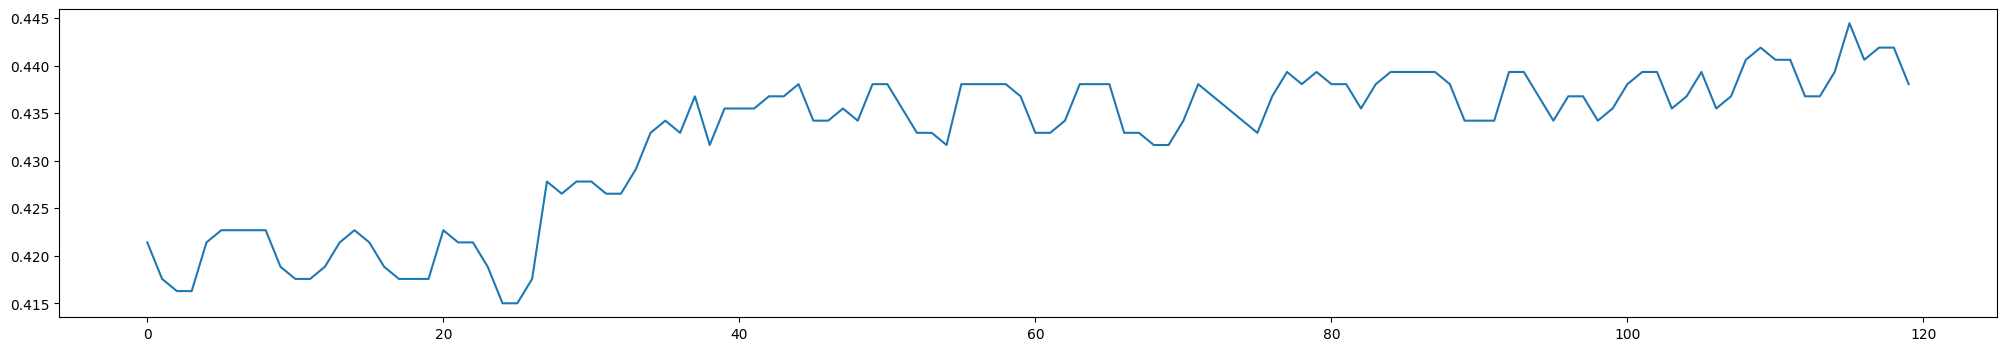

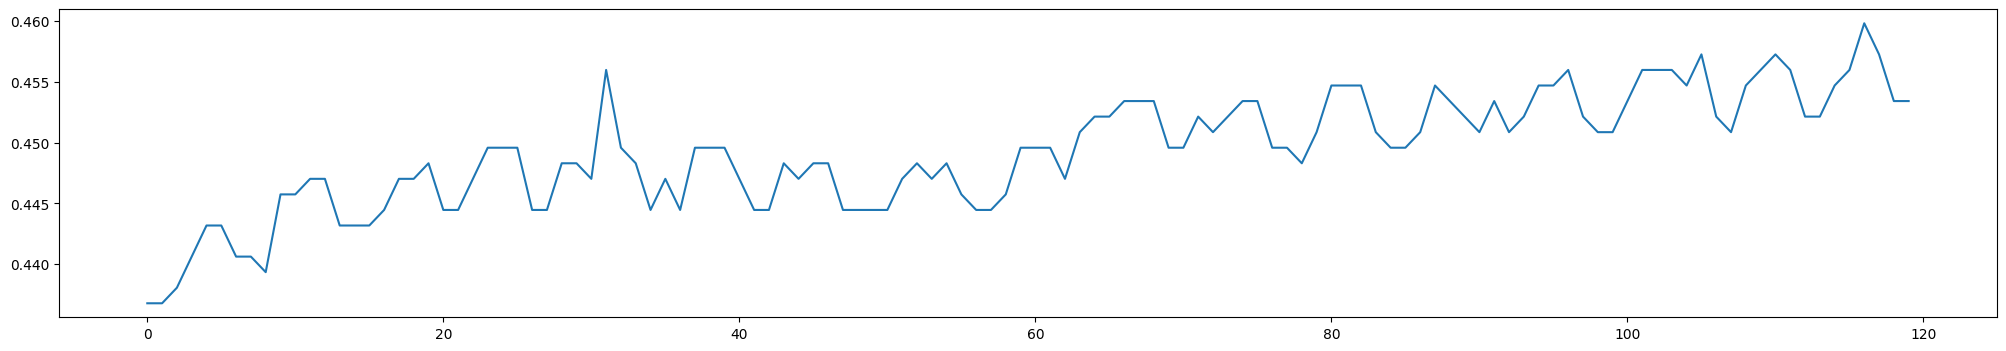

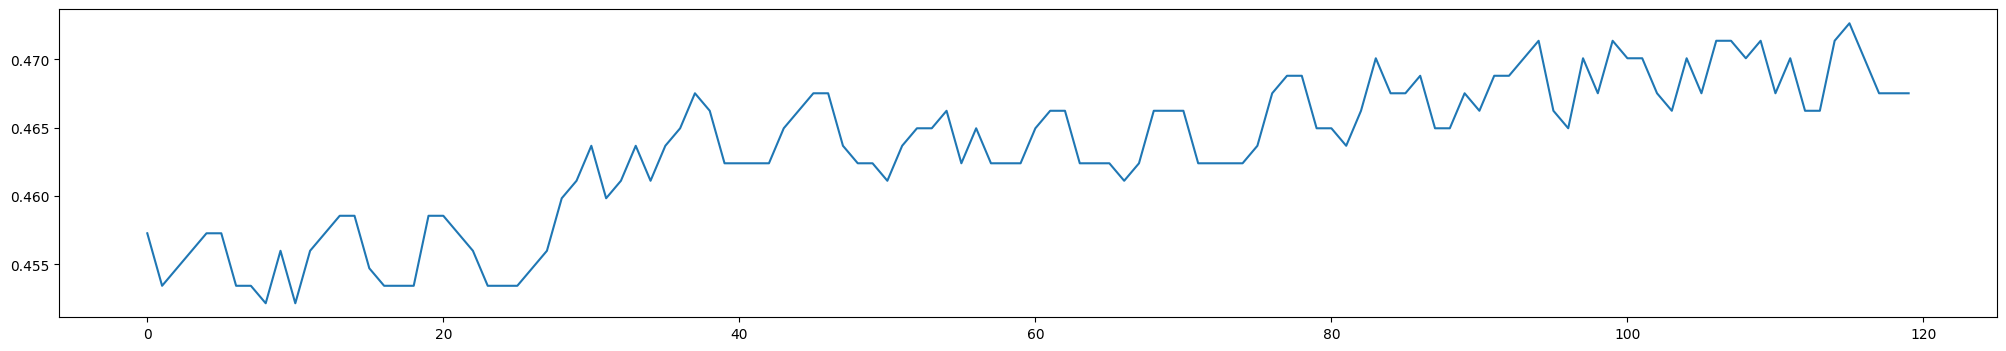

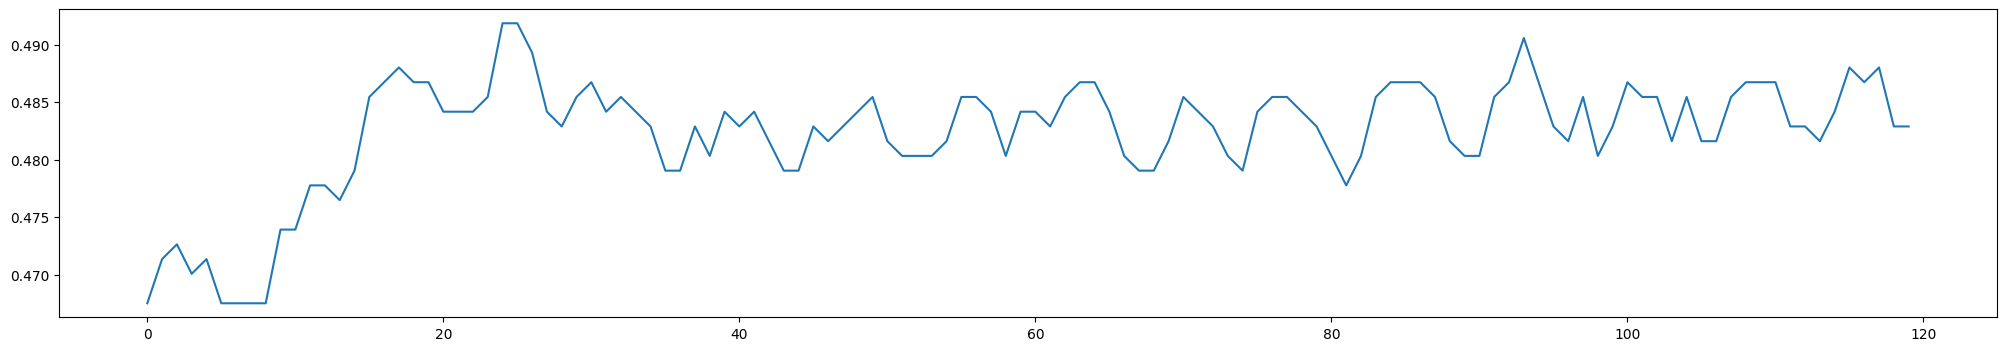

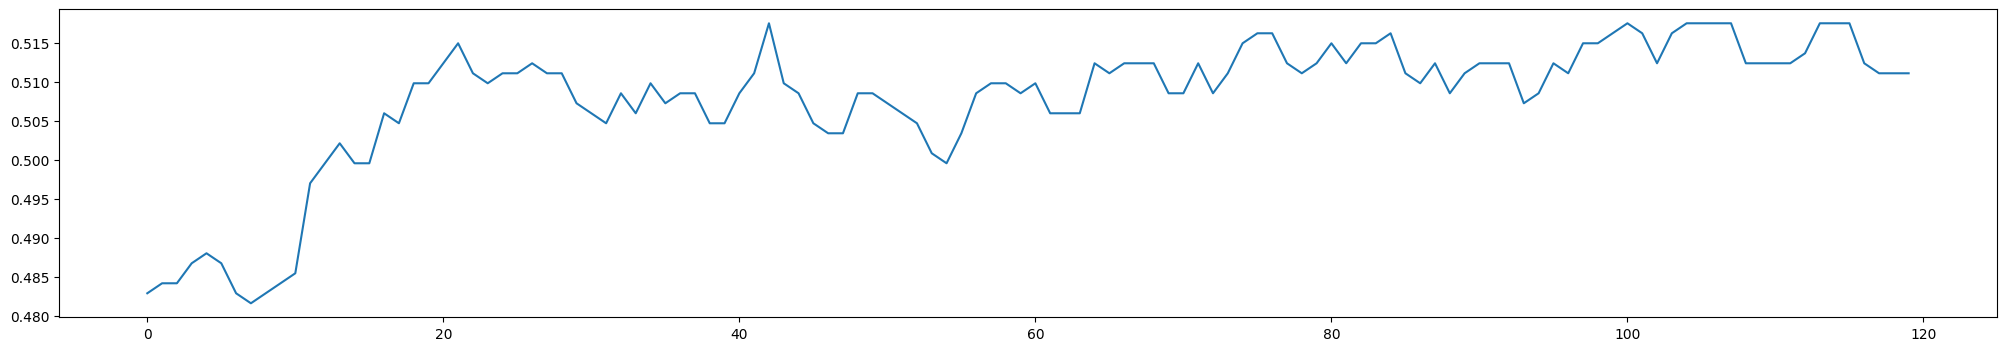

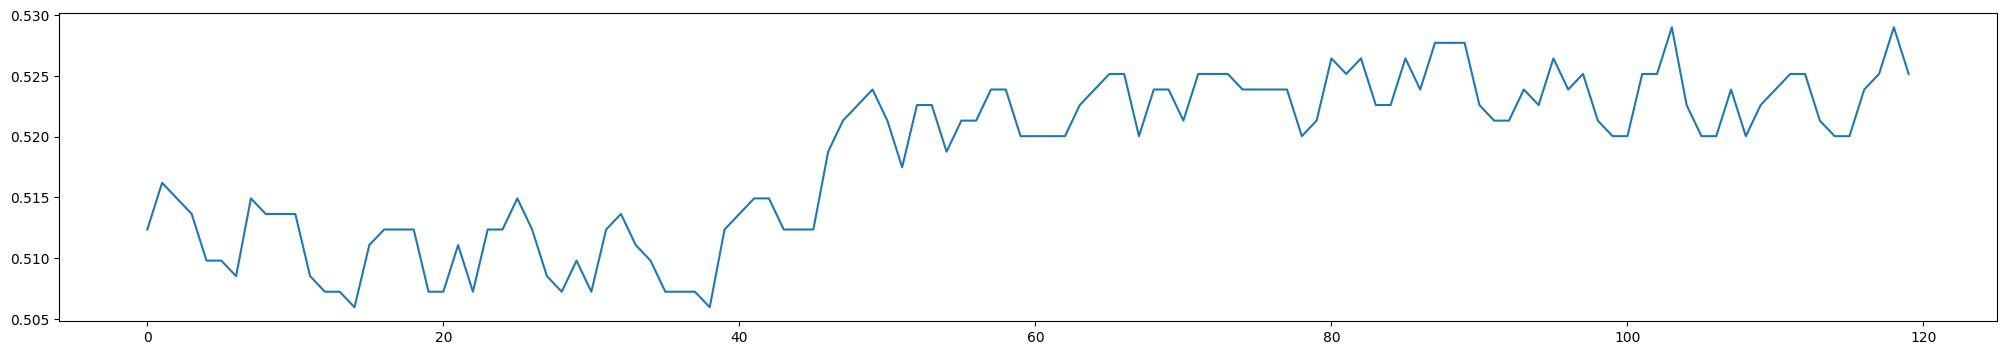

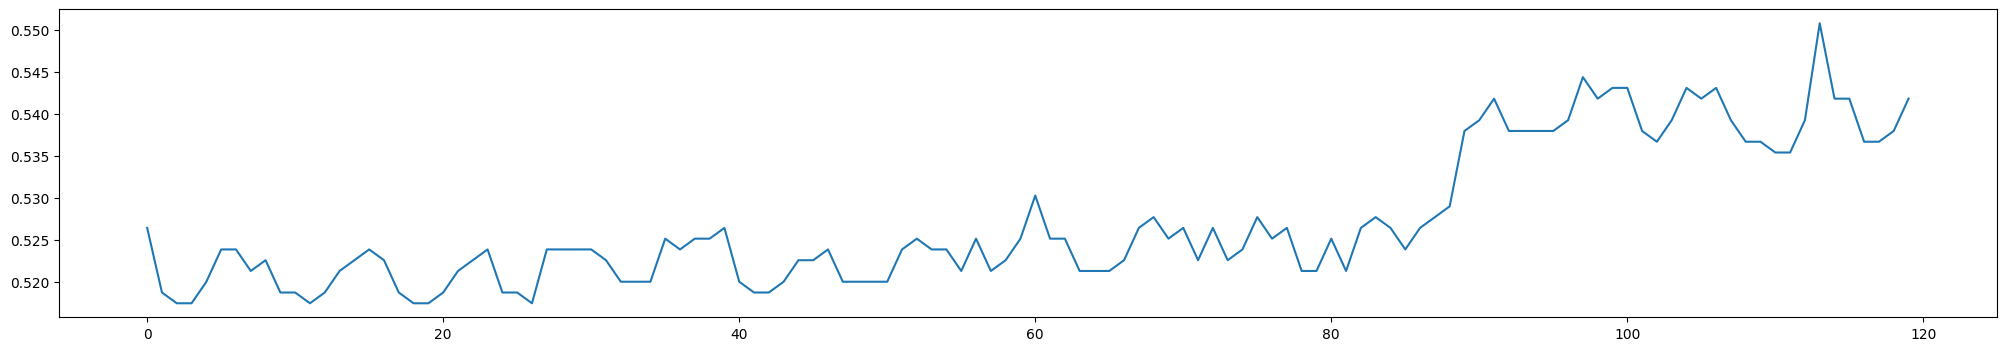

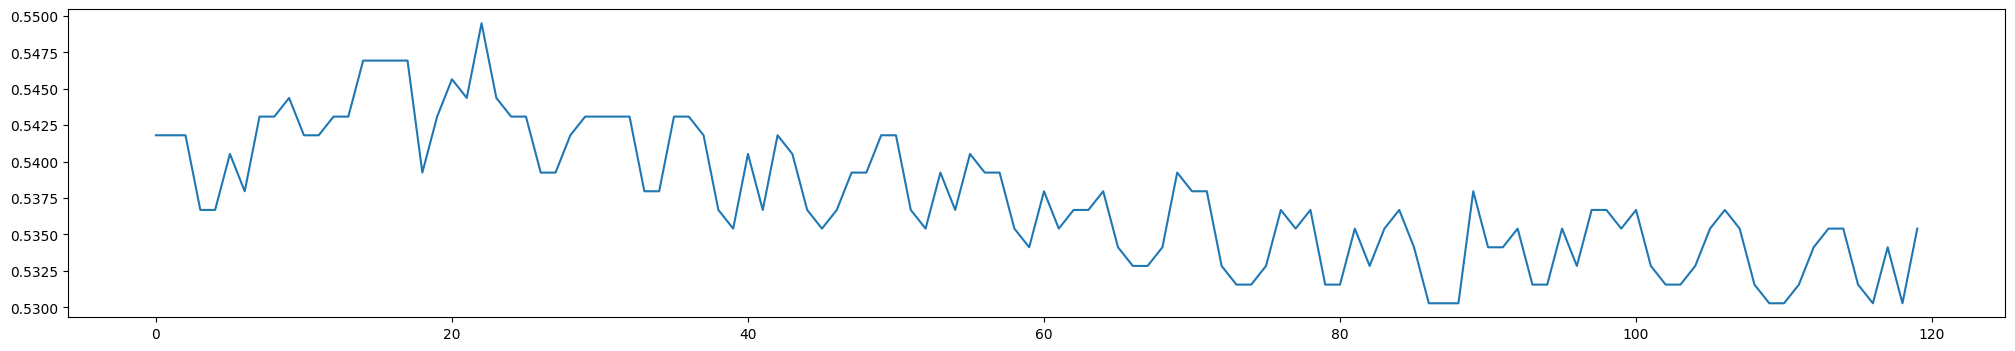

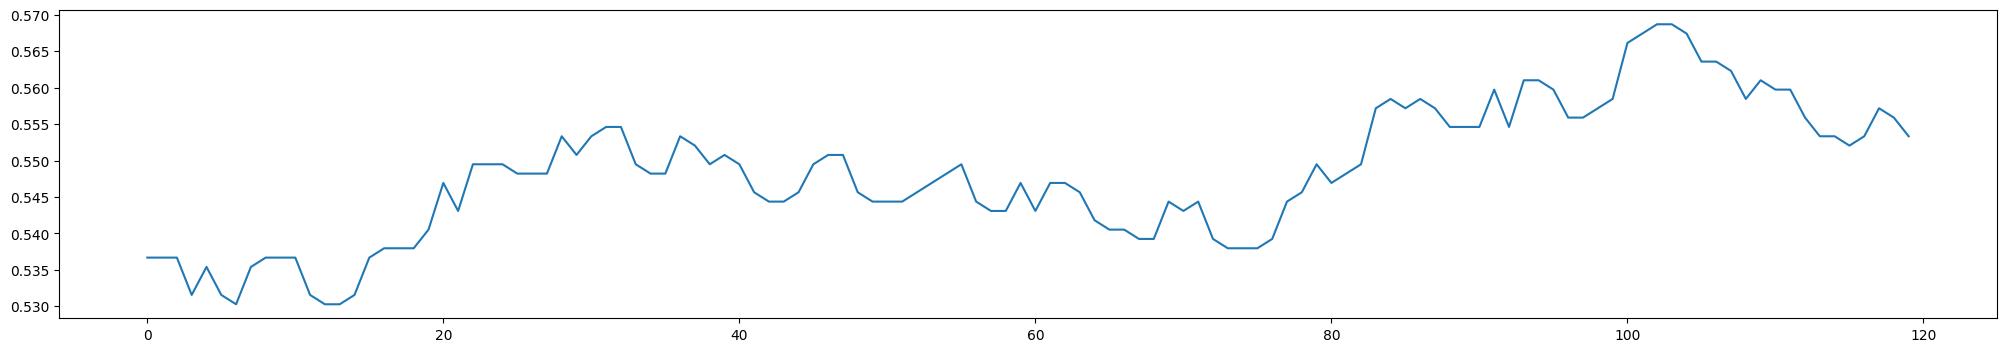

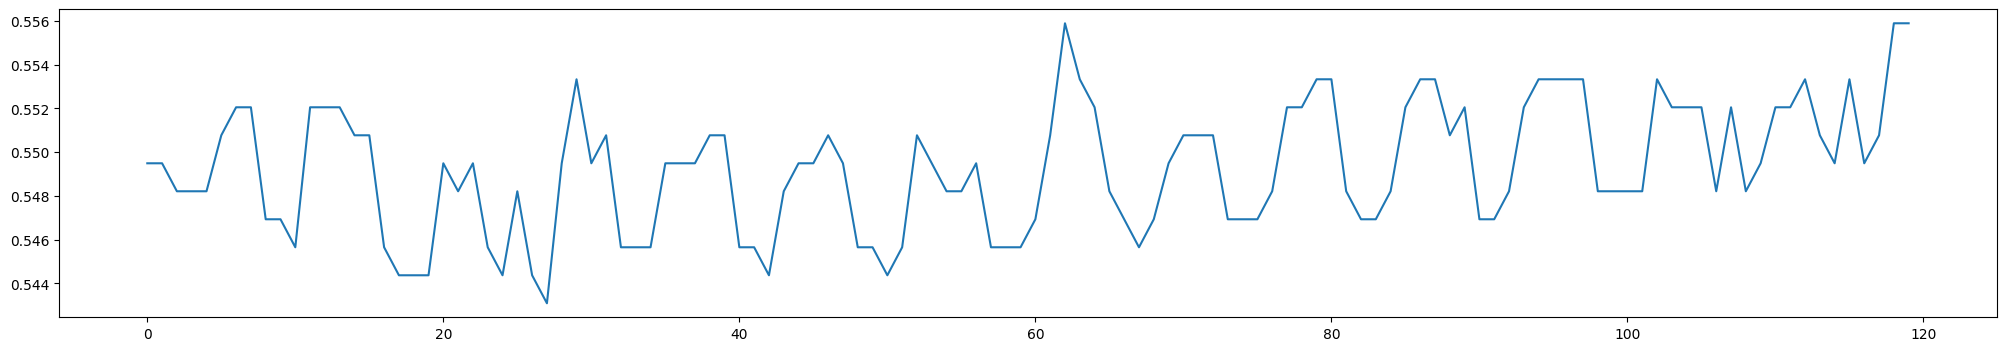

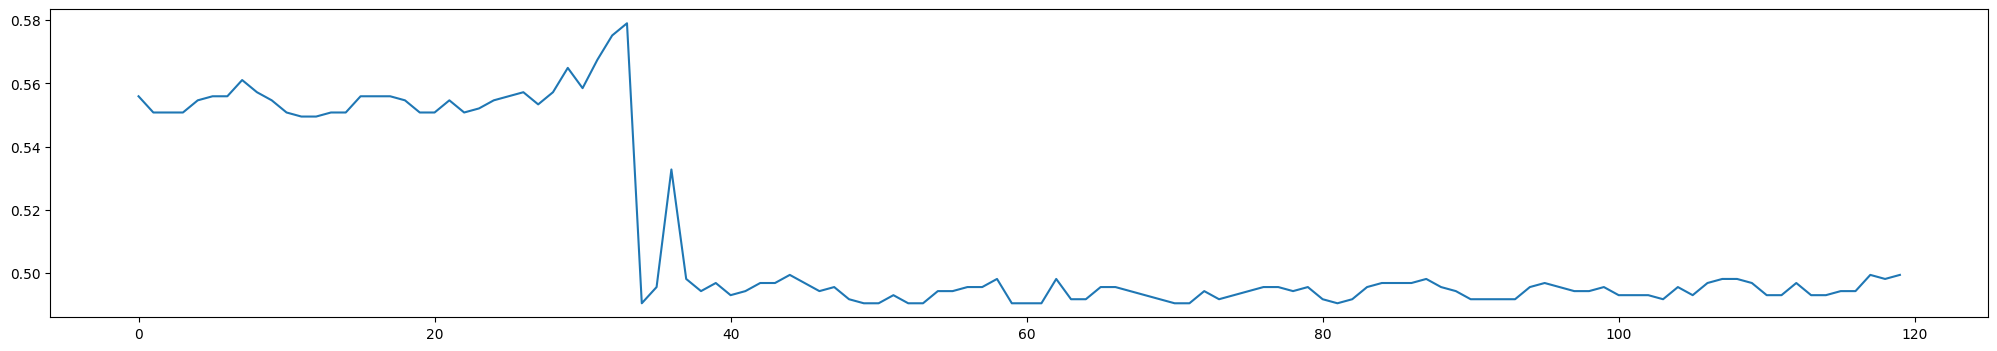

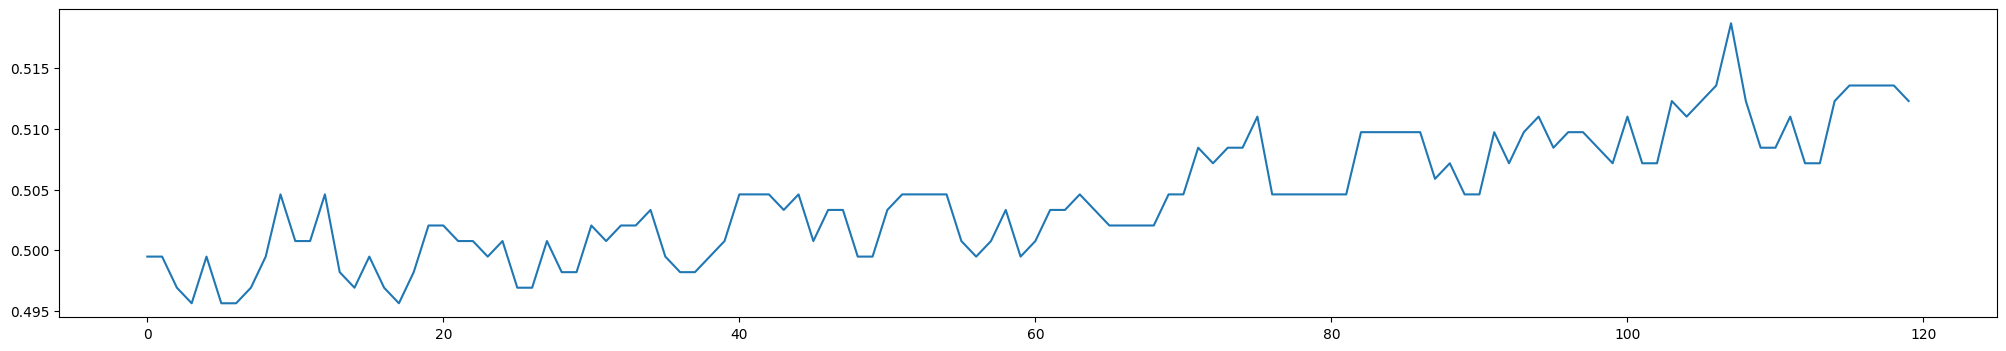

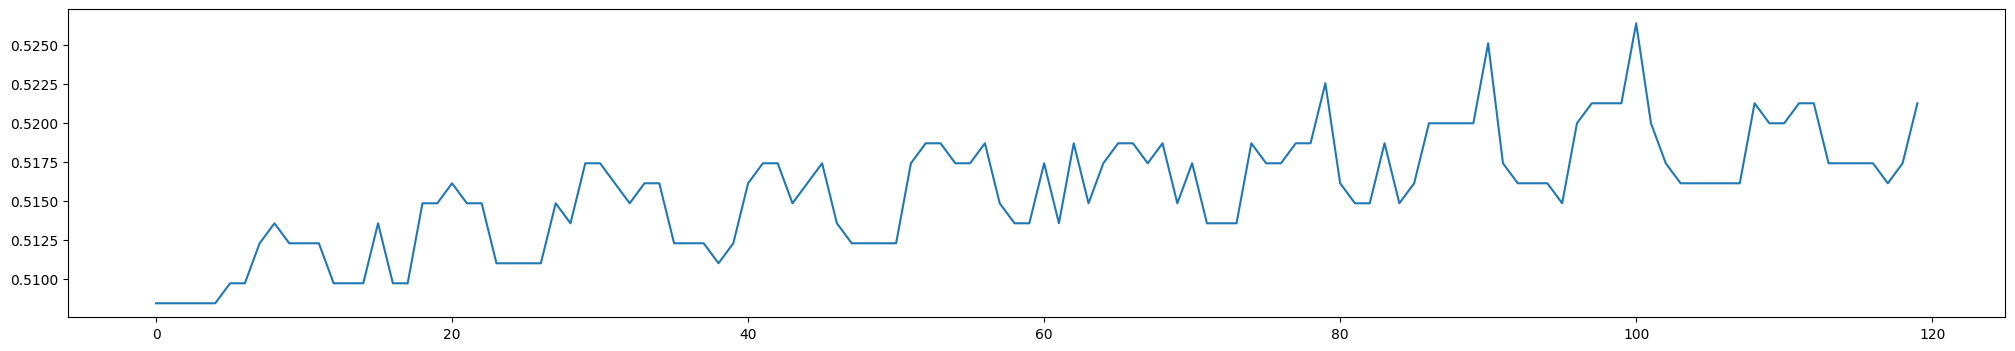

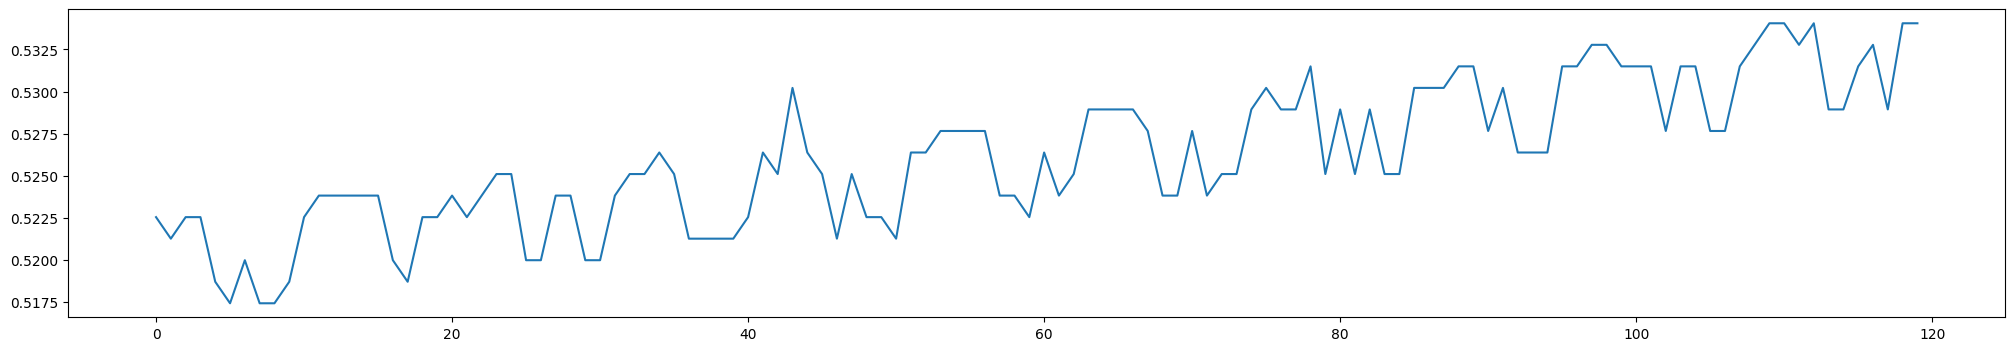

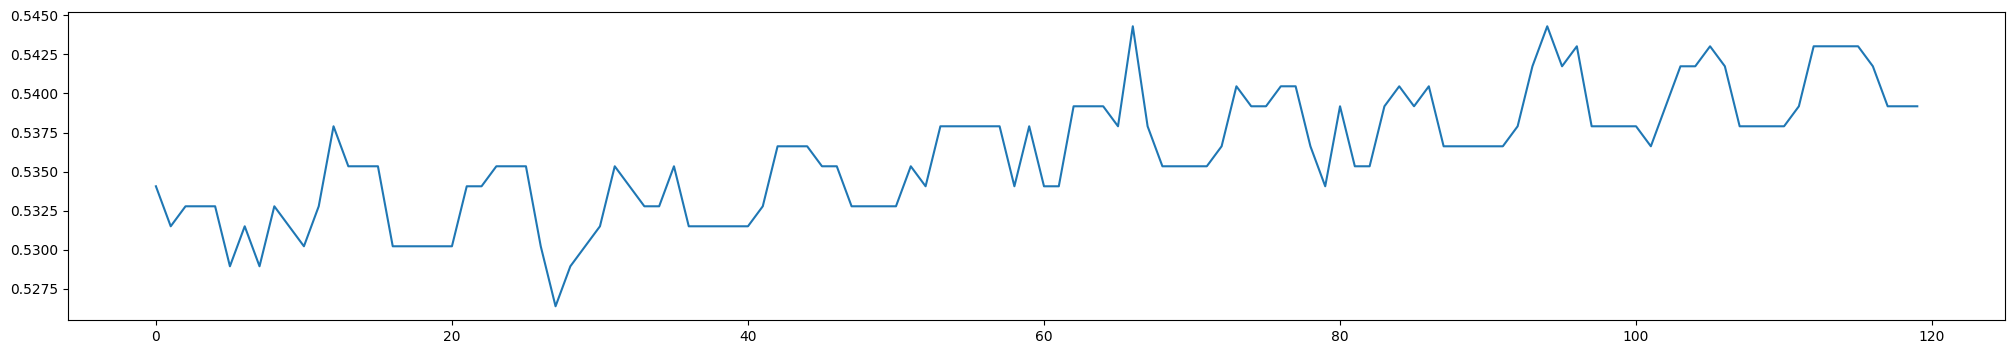

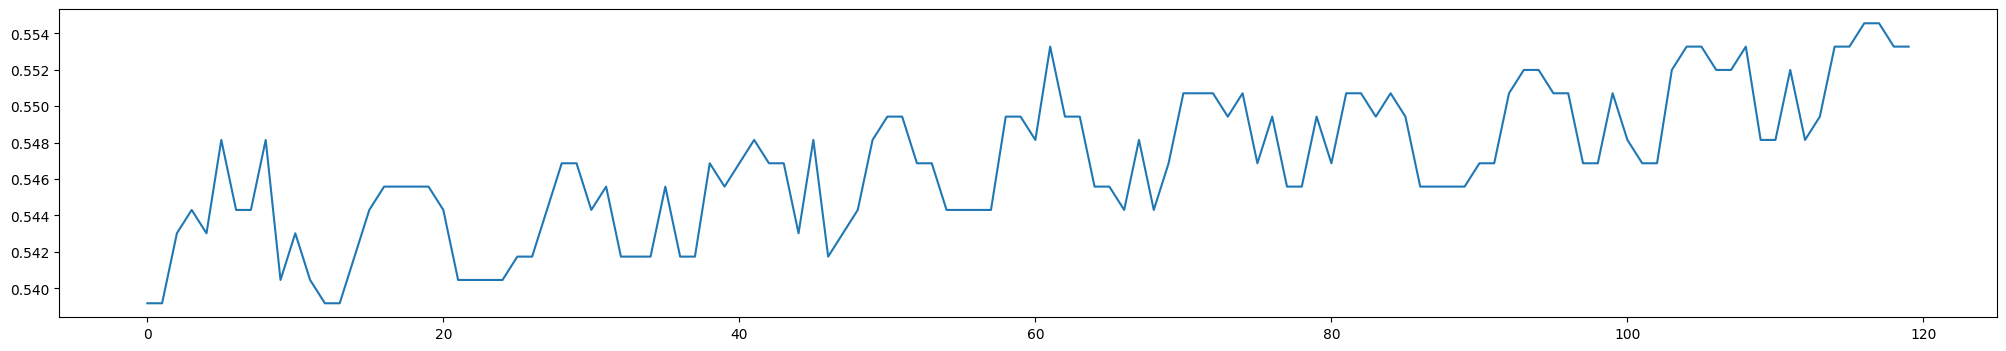

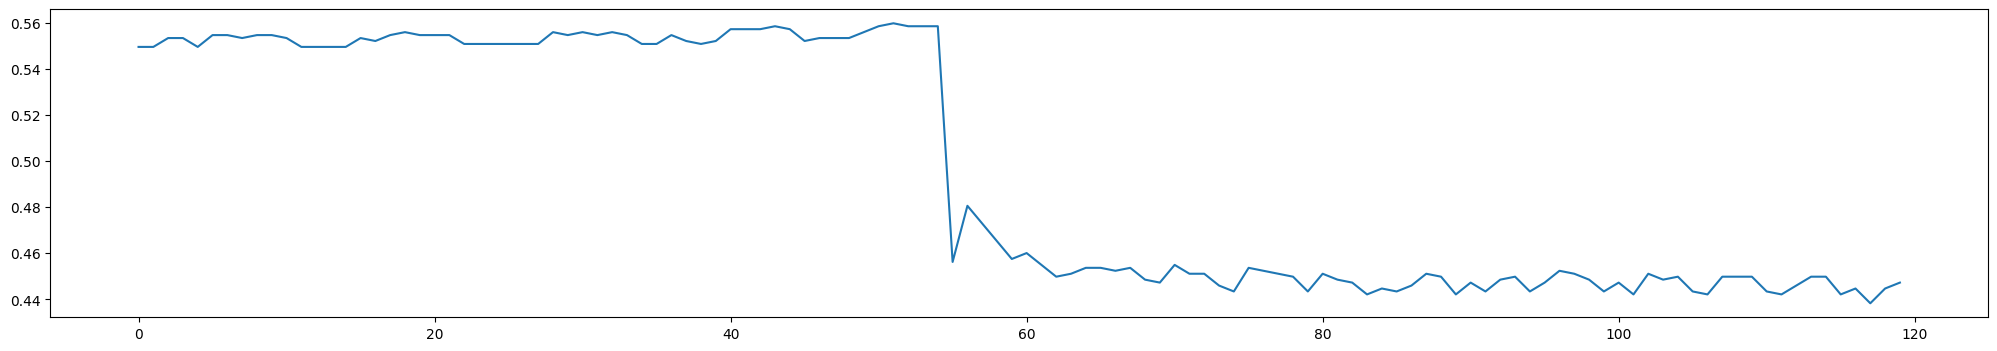

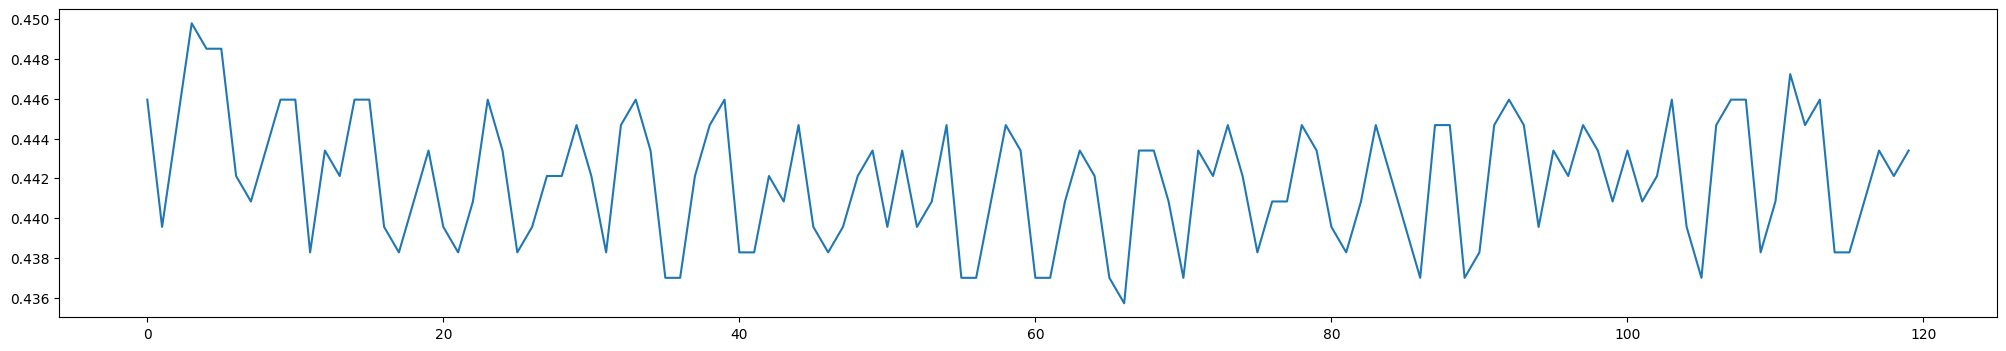

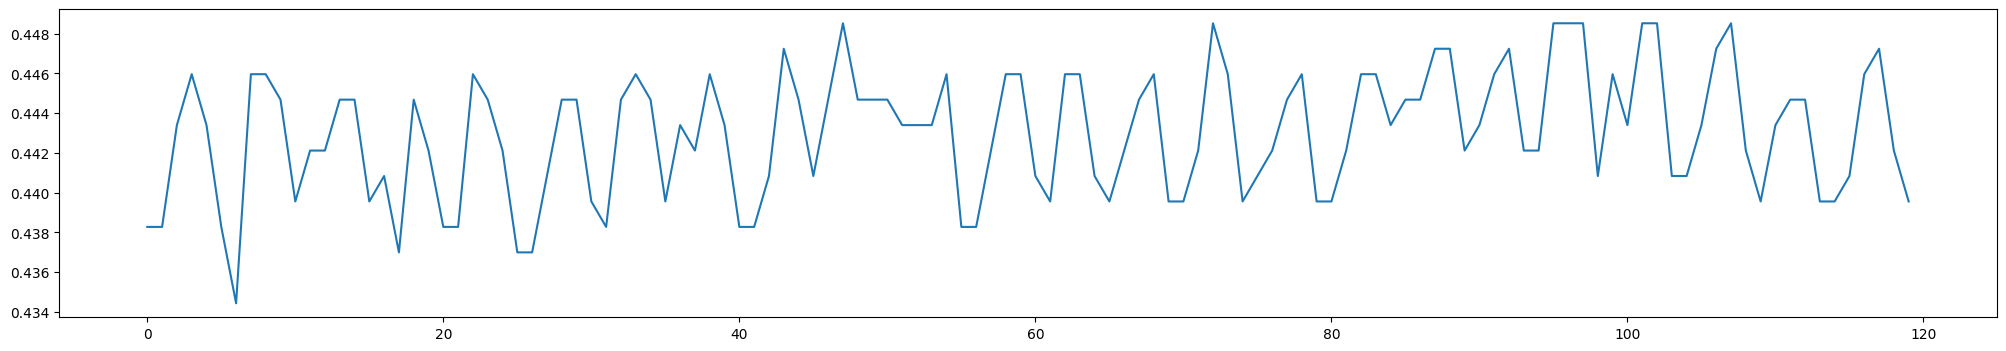

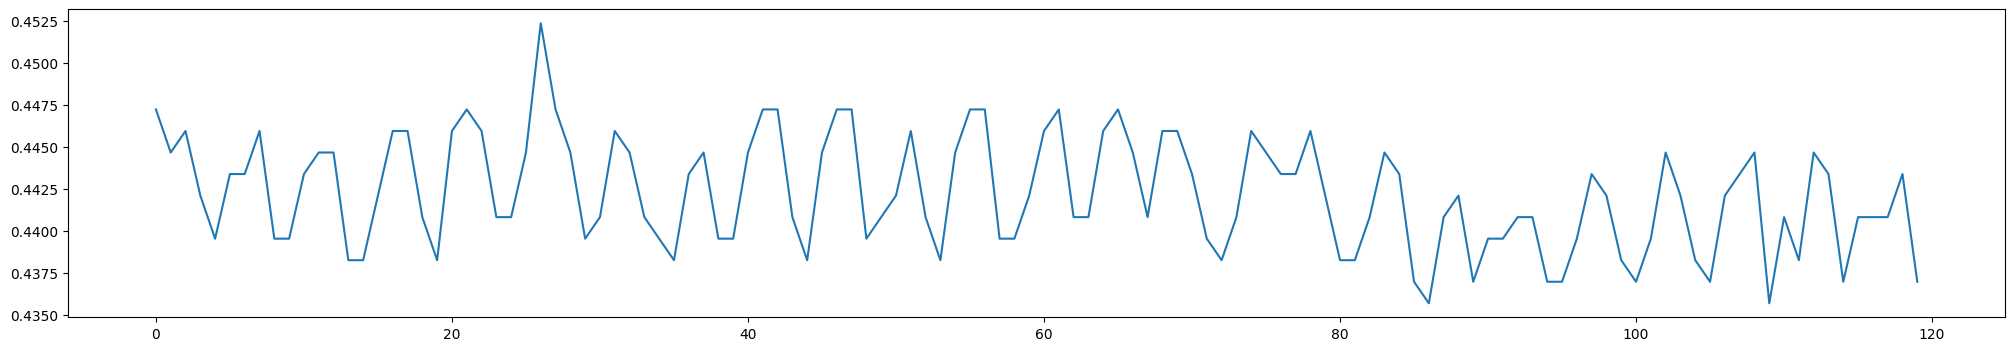

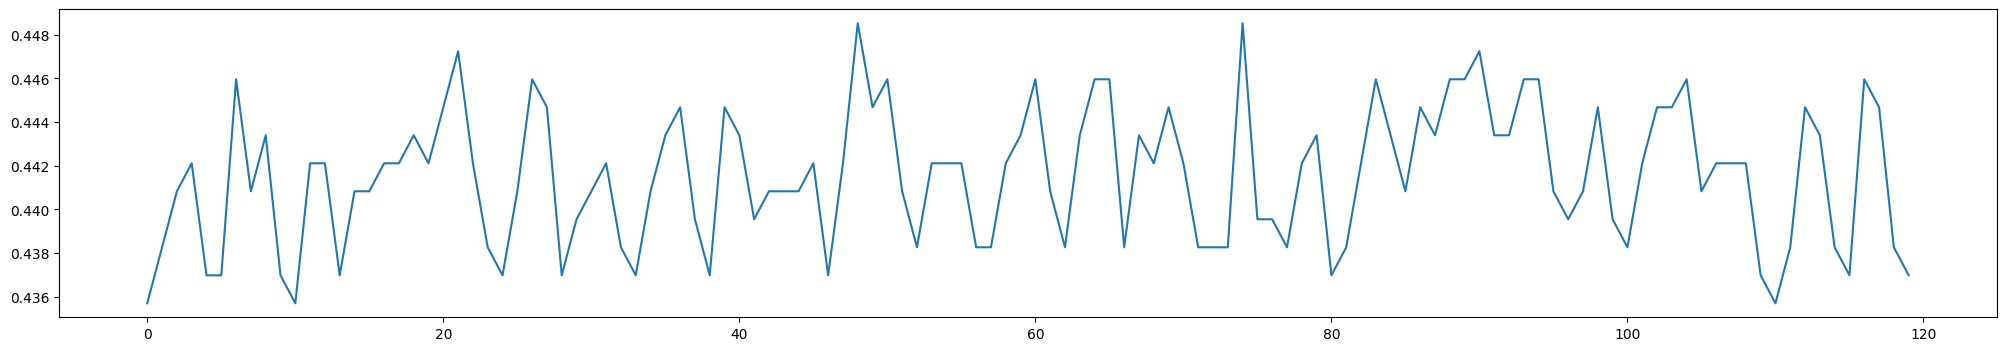

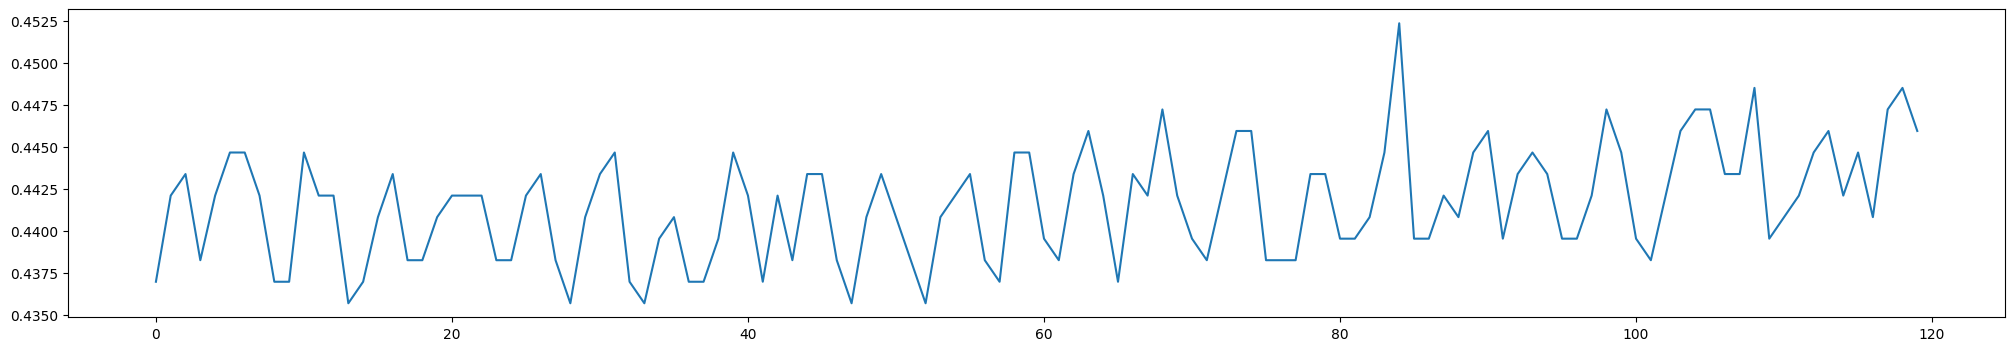

In [36]:
for w in range(0, np.shape(eda.x)[0]):
  eda.show(w)

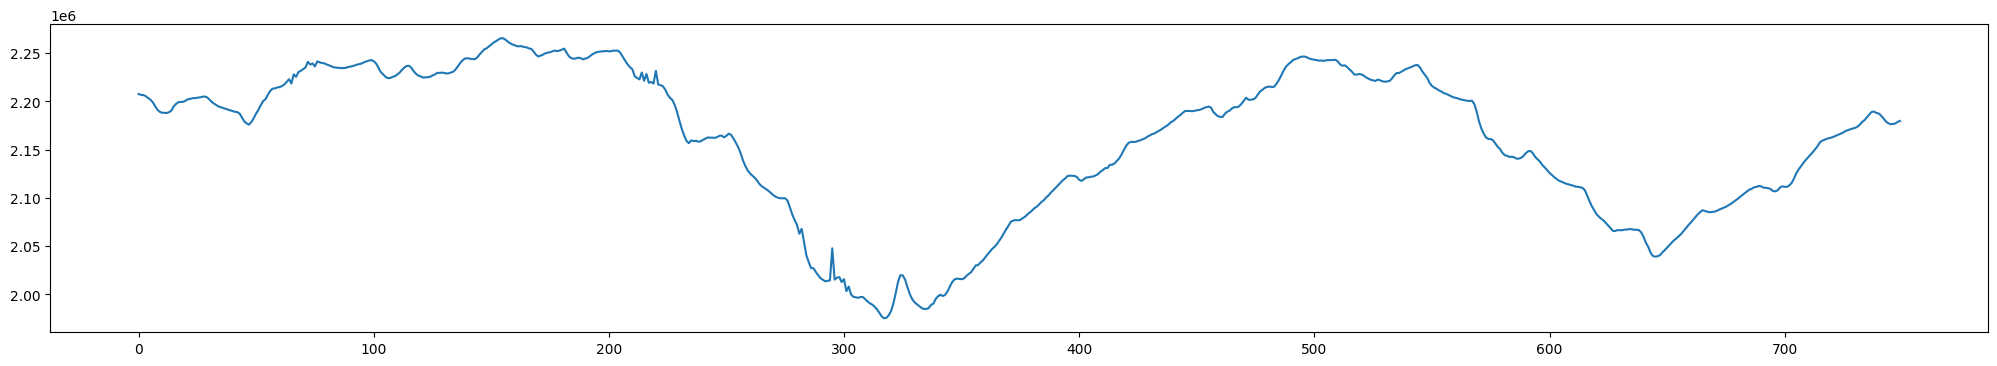

In [9]:
ppg.show(10)

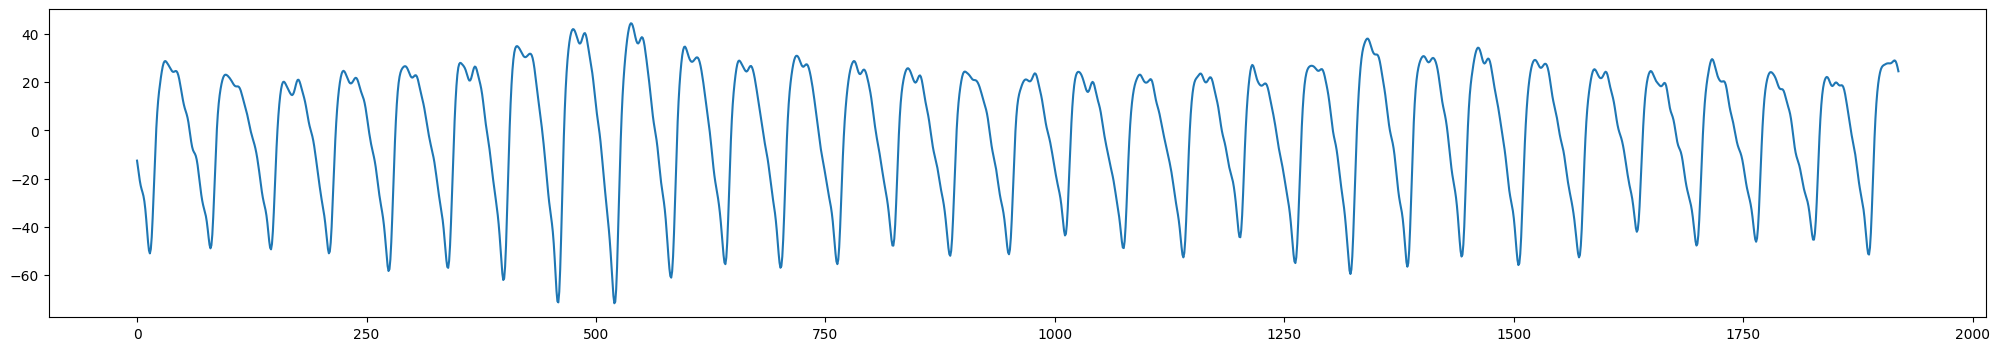

In [8]:
emp.show(10)

In [97]:
eeg =  EEGSubject(path=survey_path, id="11", device="", sensor="")

In [51]:
len(df.where(df['y'] == 0).dropna()) //256

367

In [47]:
len(df.dropna()) // 256

933

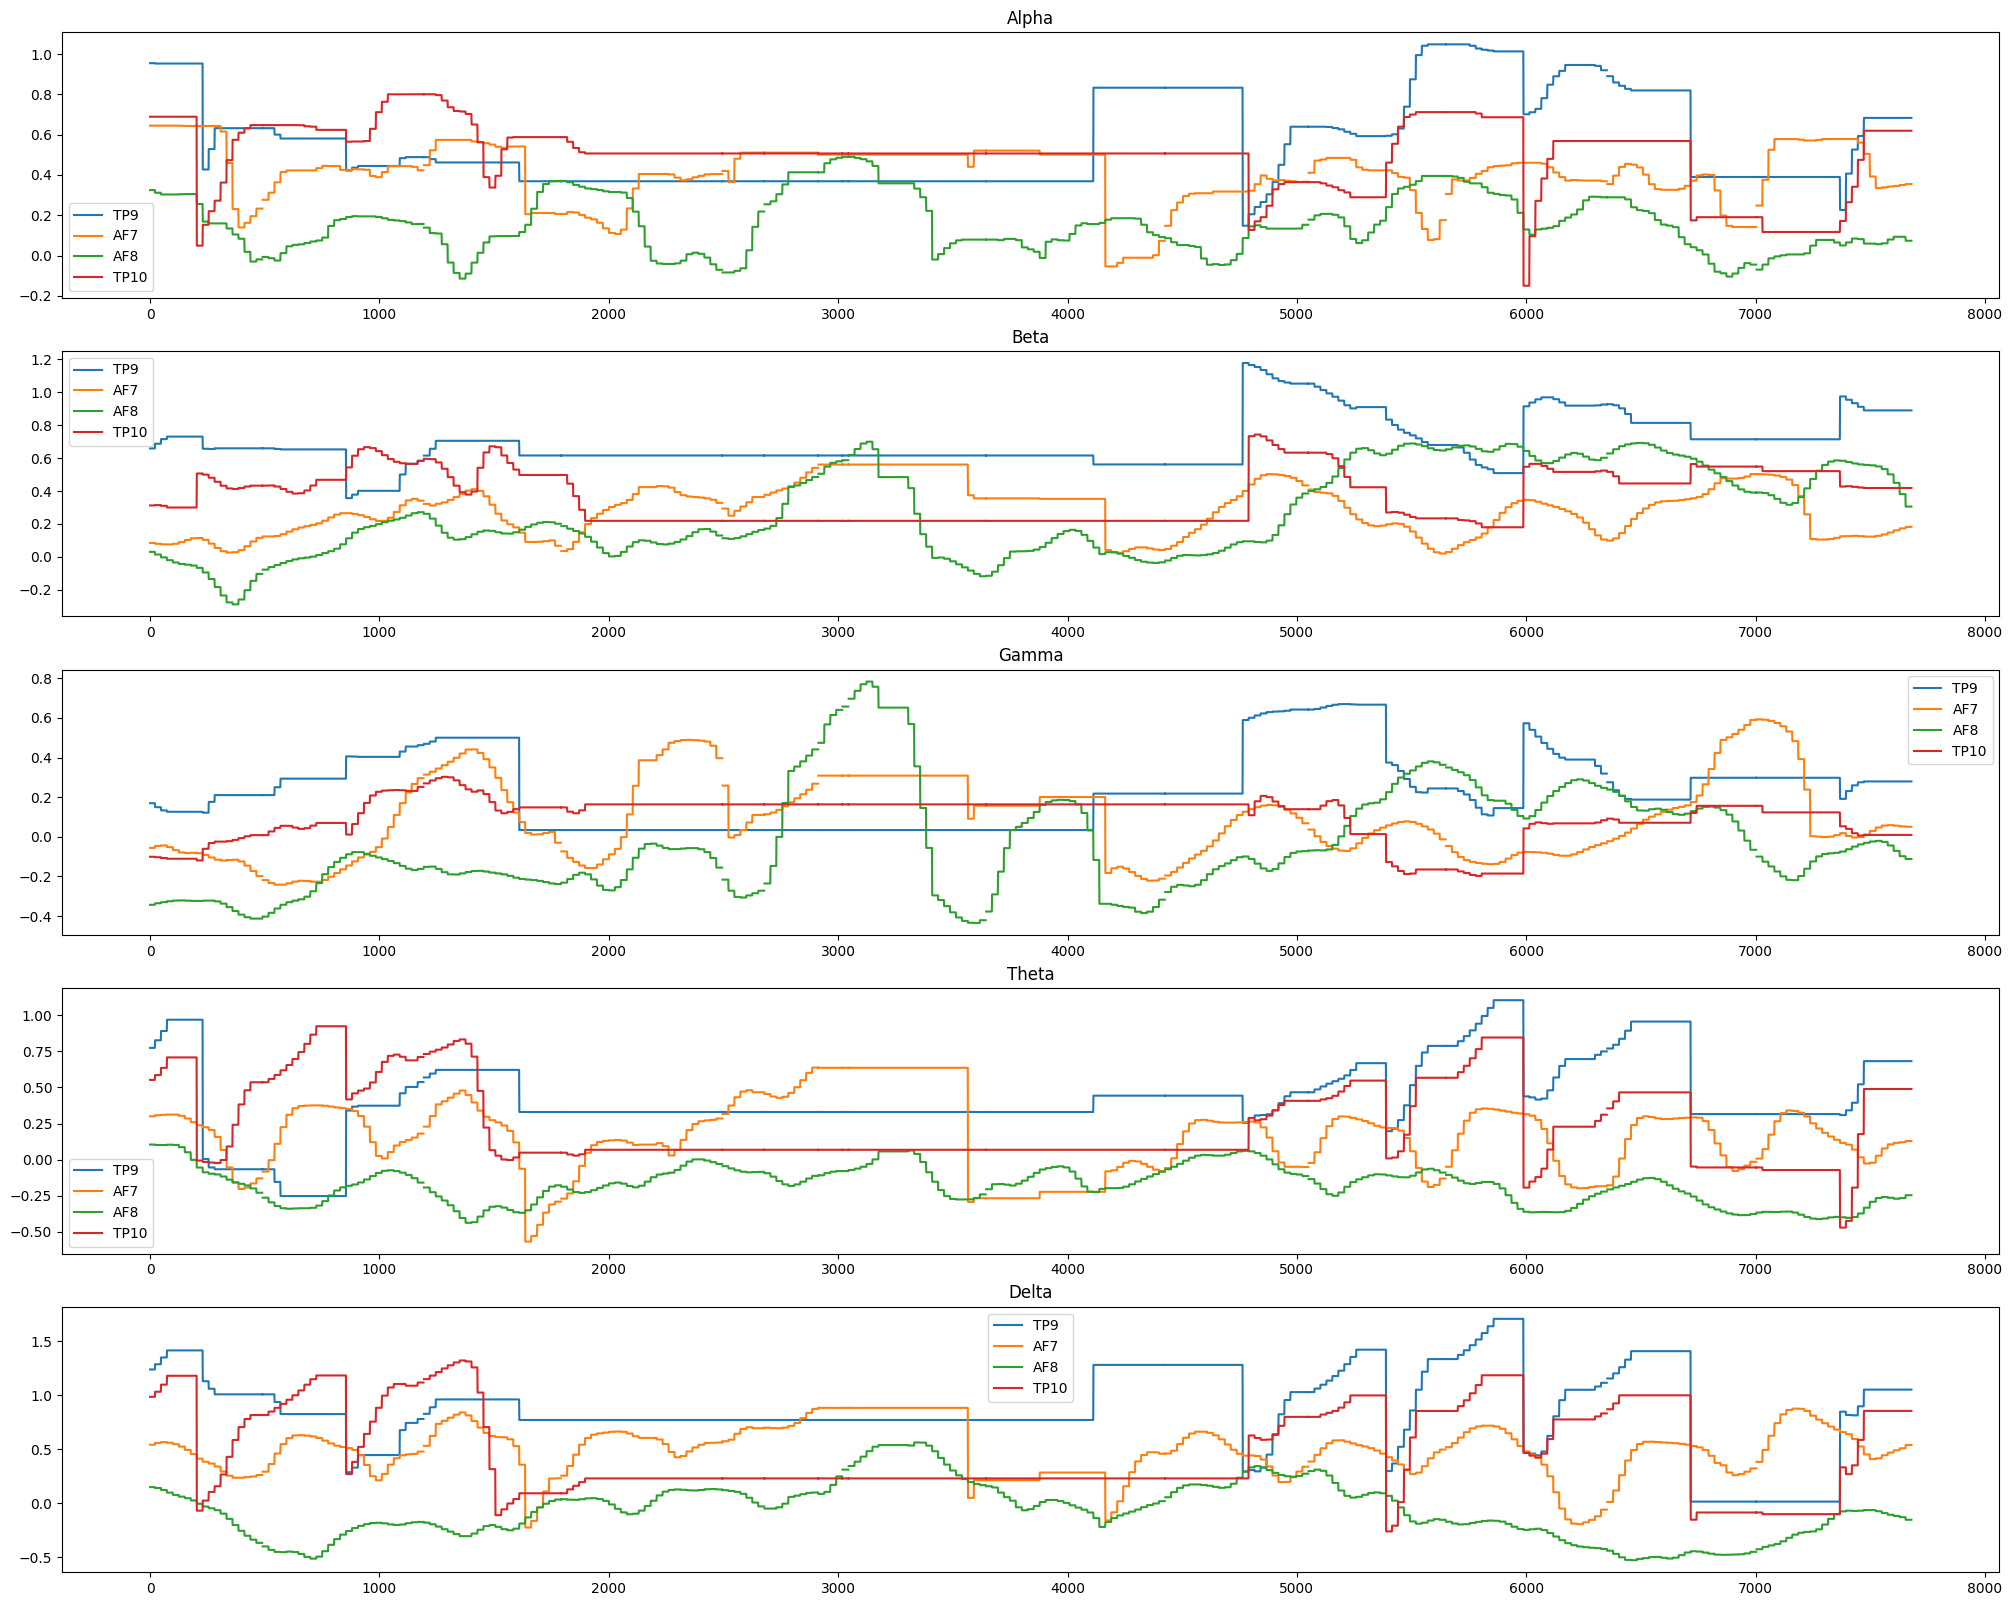

In [5]:
eeg.show(1)

In [58]:
def ft(seconds):
  return f"{seconds // 60}\'{seconds % 60}\""

In [91]:
stat = pd.DataFrame(columns=["volunteer", "sms_na", "sms_total", "sms_recording", "emp_na", "emp_total", "emp_recording", "eda_na", "eda_total", "eda_recording", "eeg_na", "eeg_total", "eeg_recording"])
vols = os.listdir(survey_path)
vols.sort()
for v in vols:
  metrics = {"volunteer": v,
             'sms_min': 0, 'sms_max': 0, 'sms_mean': 0, 'sms_std': 0,
             'emp_min': 0, 'emp_max': 0, 'emp_mean': 0, 'emp_std': 0,
             'eda_min': 0, 'eda_max': 0, 'eda_mean': 0, 'eds_std': 0,
             'eeg_min': 0, 'eeg_max': 0, 'eeg_mean': 0, 'eeg_std': 0,
             'sms_ratio': 0,'emp_ratio': 0,'eda_ratio': 0,'eeg_ratio': 0, 'sms_t': '', 'emp_t': '', 'eda_t': '', 'eeg_t': '', "sms_na": 0, "sms_total": 0, "sms_recording": 0, "emp_na": 0, "emp_total": 0, "emp_recording": 0, "eda_na": 0, "eda_total": 0, "eda_recording": 0, "eeg_na": 0, "eeg_total": 0, "eeg_recording": 0}
  samsung = pd.read_csv(os.path.join(survey_path, v, "samsung_ppg.csv"))
  emp = pd.read_csv(os.path.join(survey_path, v, "empatica_ppg.csv"))
  eda = pd.read_csv(os.path.join(survey_path, v, "empatica_eda.csv"))
  eeg = pd.read_csv(os.path.join(survey_path, v, "muse_eeg.csv"))
  # print(f"Volunteer {v}")

  total = samsung.shape[0]
  metrics["sms_total"] = total
  na = samsung.isnull().any(axis=1).sum()
  metrics["sms_na"] = na
  seconds = total // 25
  metrics["sms_recording"] = seconds
  metrics["sms_t"] = ft(seconds)
  cl_s = len(samsung.where(samsung['y'] == 1).dropna())
  bl_s = len(samsung.where(samsung['y'] == 0).dropna())
  metrics['sms_min'] = round(samsung['ppg'].min(), 3).__str__()
  metrics['sms_max'] = round(samsung['ppg'].max(), 2).__str__()
  metrics['sms_mean'] = round(samsung['ppg'].mean(), 3).__str__()
  metrics['sms_std'] = round(samsung['ppg'].std(), 3).__str__()
  s_ratio = round(cl_s / bl_s, 3)
  metrics['sms_ratio'] = s_ratio
  # print(f"  PPG| na: {na} | total: {total} | ratio: {s_ratio} | {seconds // 60}\' {seconds % 60}\"")

  total = emp.shape[0]
  metrics["emp_total"] = total
  na = emp.isnull().any(axis=1).sum()
  metrics["emp_na"] = na
  cl = len(emp.where(emp['y'] == 1).dropna())
  bl = len(emp.where(emp['y'] == 0).dropna())
  seconds = total // 64
  metrics["emp_t"] = ft(seconds)
  metrics["emp_recording"] = seconds
  emp_ratio = round(cl / bl, 3)
  metrics['emp_ratio'] = emp_ratio
  metrics['emp_min'] = round(emp['ppg'].min(), 3).__str__()
  metrics['emp_max'] = round(emp['ppg'].max(), 3).__str__()
  metrics['emp_mean'] = round(emp['ppg'].mean(), 3).__str__()
  metrics['emp_std'] = round(emp['ppg'].std(), 3).__str__()
  # print(f"  EMP| na: {na} | total: {total} | ratio: {emp_ratio} | {seconds // 60}\' {seconds % 60}\"")

  total = eda.shape[0]
  metrics["eda_total"] = total
  na = eda.isnull().any(axis=1).sum()
  cl = len(eda.where(eda['y'] == 1).dropna())
  bl = len(eda.where(eda['y'] == 0).dropna())
  metrics["eda_na"] = na
  seconds = total // 4
  metrics["eda_t"] = ft(seconds)
  metrics["eda_recording"] = seconds
  eda_ratio = round(cl / bl, 3)
  metrics['eda_ratio'] = eda_ratio
  metrics['eda_min'] = round(eda['eda'].min(), 3).__str__()
  metrics['eda_max'] = round(eda['eda'].max(), 3).__str__()
  metrics['eda_mean'] = round(eda['eda'].mean(), 3).__str__()
  metrics['eda_std'] = round(eda['eda'].std(), 3).__str__()
  # print(f"  EDA| na: {na} | total: {total} | ratio: {eda_ratio} | {seconds // 60}\' {seconds % 60}\"")

  total = eeg.shape[0]
  metrics["eeg_total"] = total
  na = eeg.isnull().any(axis=1).sum()
  metrics["eeg_na"] = na
  cl = len(eeg.where(eeg['y'] == 1).dropna())
  bl = len(eeg.where(eeg['y'] == 0).dropna())
  seconds = total // 256
  metrics["eeg_t"] = ft(seconds)
  metrics["eeg_recording"] = seconds
  eeg_ratio = round(cl / (bl | 1), 3)
  metrics['eeg_ratio'] = eeg_ratio
  # print(f"  EEG| na: {na} | total: {total} | ratio: {eeg_ratio} | {seconds // 60}\' {seconds % 60}\"")

  latex = '''\
    \\midrule
    \\textbf {{Voluntário {volunteer}}} \\\\
      Samsung PPG  & {sms_t}    & {sms_ratio}    & {sms_total}  & {sms_na} & {sms_min} & {sms_max} & {sms_mean} & {sms_std}  \\\\
      Empatica PPG  & {emp_t}    & {emp_ratio}    & {emp_total}  & {emp_na} & {emp_min} & {emp_max} & {emp_mean} & {emp_std} \\\\
      Empatica EDA  & {eda_t}    & {eda_ratio}    & {eda_total}  & {eda_na}& {eda_min} & {eda_max} & {eda_mean} & {eda_std}  \\\\
      Muse EEG  & {eeg_t}    & {eeg_ratio}    & {eeg_total}  & {eeg_na} & N/A & N/A & N/A & N/A \\\\
  '''.format(**metrics)
  print(latex)

  # row = pd.DataFrame(data=metrics, index=[0])
  # stat = pd.concat([stat, row], ignore_index=True)


    \midrule
    \textbf {Voluntário 11} \\
      Samsung PPG  & 13'54"    & 1.253    & 20874  & 0 & 1823074.0 & 2414563.0 & 2099784.948 & 126577.809  \\
      Empatica PPG  & 13'51"    & 1.254    & 53198  & 0 & -239.73 & 231.78 & 0.037 & 47.396 \\
      Empatica EDA  & 13'51"    & 1.254    & 3325  & 0& 0.231 & 0.579 & 0.472 & 0.066  \\
      Muse EEG  & 6'41"    & 0.088    & 102802  & 74 & N/A & N/A & N/A & N/A \\
  
    \midrule
    \textbf {Voluntário 12} \\
      Samsung PPG  & 16'27"    & 1.675    & 24678  & 0 & 1315932.0 & 2520418.0 & 1854998.444 & 247506.706  \\
      Empatica PPG  & 17'21"    & 1.68    & 66655  & 0 & -873.33 & 537.78 & 0.138 & 73.153 \\
      Empatica EDA  & 17'20"    & 1.686    & 4163  & 0& 0.256 & 0.847 & 0.515 & 0.149  \\
      Muse EEG  & 15'36"    & 1.541    & 239704  & 718 & N/A & N/A & N/A & N/A \\
  
    \midrule
    \textbf {Voluntário 13} \\
      Samsung PPG  & 14'49"    & 1.863    & 22231  & 0 & 1757389.0 & 2379034.0 & 1982377.024 & 130148.014  \\
 

In [36]:
for row in stat.iterrows():
  print((row[1]["eeg_na"] / row[1]["eeg_total"]) * 100)

0.1691472467407763
0.1454801481098184
0.14152477562609328
0.026455026455026457
0.10570308815637552
0.10613438526326337
0.10101010101010101
0.19566142067205444
0.23630820466984193
0.07198303534950681
0.15717042129339756
0.1392581339410052
0.29953609451657043


In [21]:
stat.head(13)

,volunteer,sms_na,sms_total,sms_recording,emp_na,emp_total,emp_recording,eda_na,eda_total,eda_recording,eeg_na,eeg_total,eeg_recording
0,21,0,12162,486,0,34596,540,0,2162,540,229,135385,528
1,13,0,22231,889,0,60796,949,0,3797,949,343,235771,920
2,17,0,27097,1083,0,57303,895,0,3578,894,322,227522,888
3,20,0,13214,528,0,33844,528,0,2116,529,18,68040,265
4,14,0,23627,945,0,60018,937,0,3748,937,130,122986,480
5,15,0,22379,895,0,57677,901,0,3603,900,233,219533,857
6,16,0,21515,860,0,55117,861,0,3444,861,217,214830,839
7,18,0,26038,1041,0,62600,978,0,3913,978,483,246855,964
8,24,0,24599,983,0,63550,992,0,3973,993,386,163346,638
9,11,0,20874,834,0,53198,831,0,3325,831,74,102802,401
